# Gaurang Bharti

## How has Income Distribution and Population impacted housing prices in Vancouver?

For my project, I will be looking at the impact Income Distribution has on housing and rental prices. The expectation is to find a positive correlation that is > 0.5 as I believe the Income Distribution of a region plays a significant role in the decisions relating to pricing for houses. I believe the same to be true for Population as well. My dataset consists of multiple files of related data that I will showcase via the EDA and combine them according to related columns.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
file = ("../data/raw/housing-supply-price-rental.csv")

In [ ]:
dataset = pd.read_csv(file)

In [ ]:
dataset

,Unnamed: 0,year,total_dwelling,single_detached,multiple,semi_detached,row,apartment,total_dwelling_market,homeownership_freehold,...,one_bedroom,two_bedroom,three_bedroom,population,labour_participation_rate,employment_change,unemployment_rate,disposable_income_change,migration,region
0,0,1990.0,3297,2847,450,57,6,387,2274,2004.0,...,418,524,608,1105.421,67.300,0.219444,7.4,-2.669133,-5108,manitoba
1,1,1991.0,1950,1589,361,14,0,347,1438,1085.0,...,424,531,630,1109.604,67.025,-1.364064,8.6,-2.669133,-5108,manitoba
2,2,1992.0,2310,1683,627,64,10,553,1821,1383.0,...,434,545,644,1112.689,66.475,-1.351685,9.3,-0.326989,-5108,manitoba
3,3,1993.0,2425,1874,551,52,83,416,1702,1338.0,...,435,550,652,1117.618,66.850,0.766782,9.3,-0.453243,-2520,manitoba
4,4,1994.0,3197,2441,756,72,410,274,1664,1289.0,...,440,551,645,1123.230,66.750,0.774181,8.8,0.161821,-1996,manitoba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,22,2012.0,896,449,447,12,91,344,896,552.0,...,850,1005,1230,165.914,64.300,1.639344,6.7,NaN,1239,kingston
940,23,2013.0,856,325,531,8,103,420,856,436.0,...,859,1054,1463,166.950,64.900,2.481390,6.3,NaN,978,kingston
941,24,2014.0,672,338,334,26,102,206,672,462.0,...,888,1070,1411,168.164,63.600,-1.452785,6.8,NaN,1185,kingston
942,25,2015.0,655,275,380,14,53,313,655,332.0,...,915,1096,1469,169.420,64.300,1.842752,6.6,NaN,1259,kingston


### Initial comments on dataset

The dataset has quite a lot of data that's segregated by region for more granular analysis. The data is segregated by different types of houses, so we will try to do a fairly general analysis of the overall expenses - not looking at any specific type.

# Exploratory Data Analysis

In [ ]:
dataset.head()

,Unnamed: 0,year,total_dwelling,single_detached,multiple,semi_detached,row,apartment,total_dwelling_market,homeownership_freehold,...,one_bedroom,two_bedroom,three_bedroom,population,labour_participation_rate,employment_change,unemployment_rate,disposable_income_change,migration,region
0,0,1990.0,3297,2847,450,57,6,387,2274,2004.0,...,418,524,608,1105.421,67.300,0.219444,7.4,-2.669133,-5108,manitoba
1,1,1991.0,1950,1589,361,14,0,347,1438,1085.0,...,424,531,630,1109.604,67.025,-1.364064,8.6,-2.669133,-5108,manitoba
2,2,1992.0,2310,1683,627,64,10,553,1821,1383.0,...,434,545,644,1112.689,66.475,-1.351685,9.3,-0.326989,-5108,manitoba
3,3,1993.0,2425,1874,551,52,83,416,1702,1338.0,...,435,550,652,1117.618,66.850,0.766782,9.3,-0.453243,-2520,manitoba
4,4,1994.0,3197,2441,756,72,410,274,1664,1289.0,...,440,551,645,1123.230,66.750,0.774181,8.8,0.161821,-1996,manitoba


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         944 non-null    int64  
 1   year                               944 non-null    float64
 2   total_dwelling                     944 non-null    int64  
 3   single_detached                    944 non-null    int64  
 4   multiple                           944 non-null    int64  
 5   semi_detached                      944 non-null    int64  
 6   row                                944 non-null    int64  
 7   apartment                          944 non-null    int64  
 8   total_dwelling_market              944 non-null    int64  
 9   homeownership_freehold             943 non-null    float64
 10  rental                             944 non-null    int64  
 11  homeownership_condo                944 non-null    int64  

[Text(0.5, 1.0, 'New dwellings started per year by region'),
 Text(0, 0.5, 'Total new dwellings'),
 Text(0.5, 0, 'Years')]

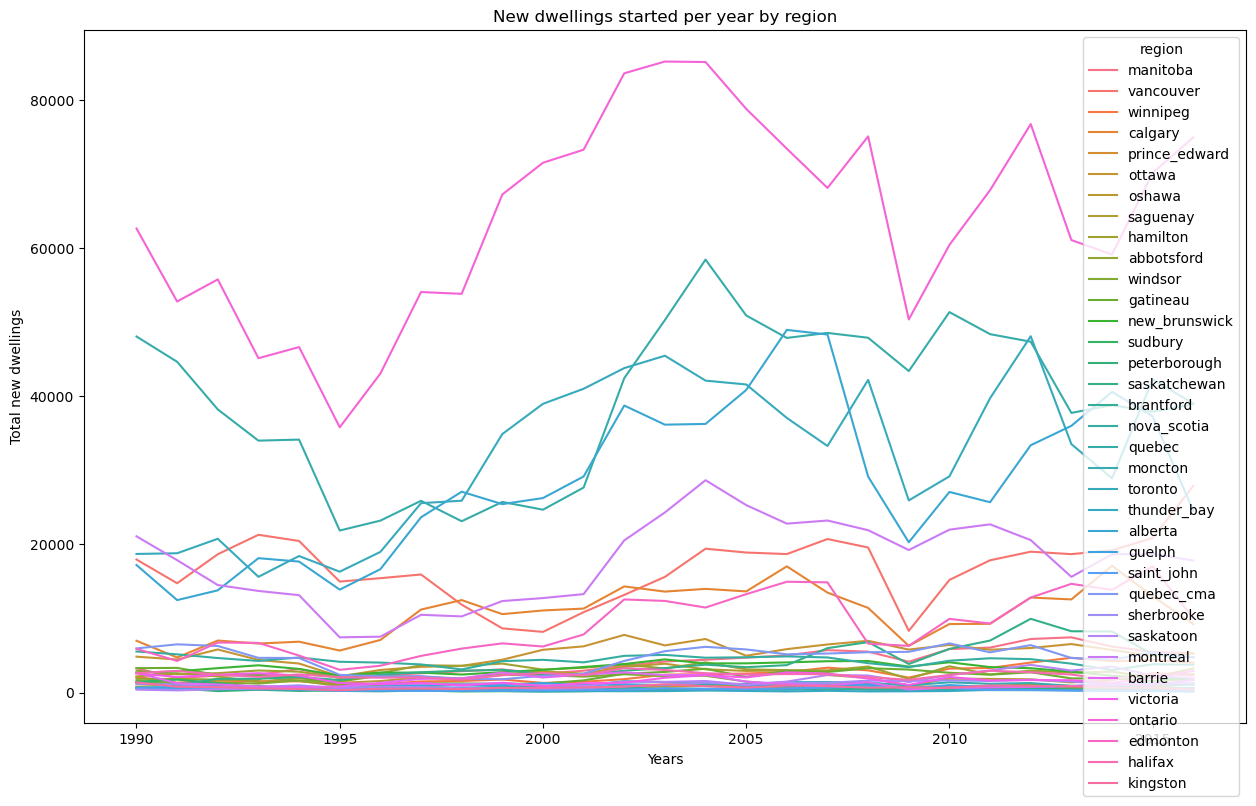

In [ ]:
plt.figure(figsize=(15, 9))
sns.lineplot(data=dataset, x="year", y="total_dwelling", hue="region").set(title="New dwellings started per year by region", ylabel="Total new dwellings", xlabel="Years")

### Comments
Here, we're able to see how many new dwellings (places to live) have their construction started on a year-by-year and region-by-region basis. This is a great way to get insight on the situation of the housing market across the years

<AxesSubplot:>

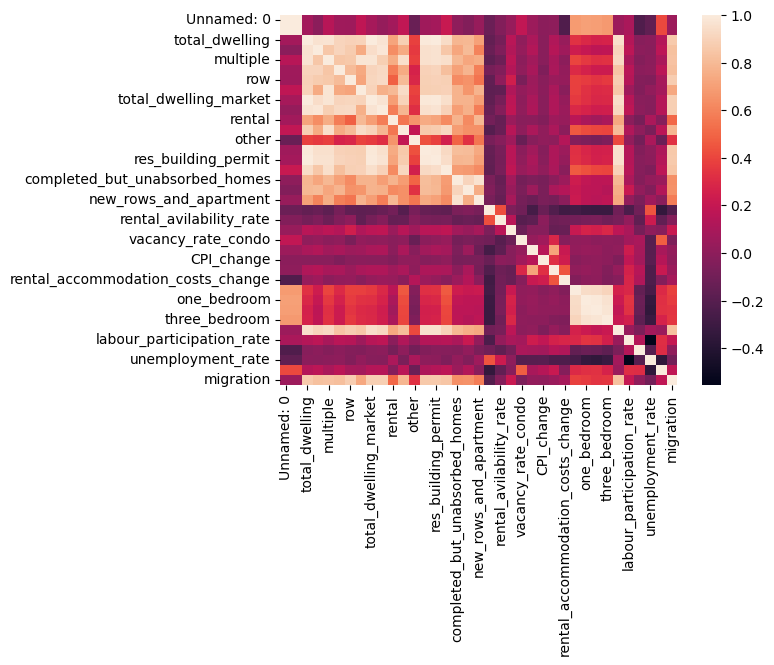

In [ ]:
sns.heatmap(dataset.corr())

### Comments:
This visualisation gives us a rounded picture of the correlations across the dataset. We get to see correlations across variables like unemployment rate and CPI change. The two seem to have a negative correlation which is a good sign. Like that, we're able to get a lot of granular correlations

In [ ]:
income_file = ("../data/raw/vancouver_income_main.csv")
income_dataset = pd.read_csv(income_file)
income_dataset

,Year,"Number of persons (x1,000)","Number with income(x1,000)","Aggregate income (x1,000,000)",Average income (excluding zeros),Median income (excluding zeros)
0,1991,1297,1207,50945,42200,33600
1,1992,1361,1269,54374,42900,33200
2,1993,1367,1286,51793,40300,31400
3,1994,1405,1312,53292,40600,31900
4,1995,1429,1340,55544,41500,32600
5,1996,1527,1438,57644,40100,30800
6,1997,1542,1456,59799,41100,31700
7,1998,1470,1414,59755,42200,32100
8,1999,1572,1490,62796,42200,30800
9,2000,1591,1524,64967,42600,30800


[Text(0.5, 1.0, 'Average Income in Vancouver')]

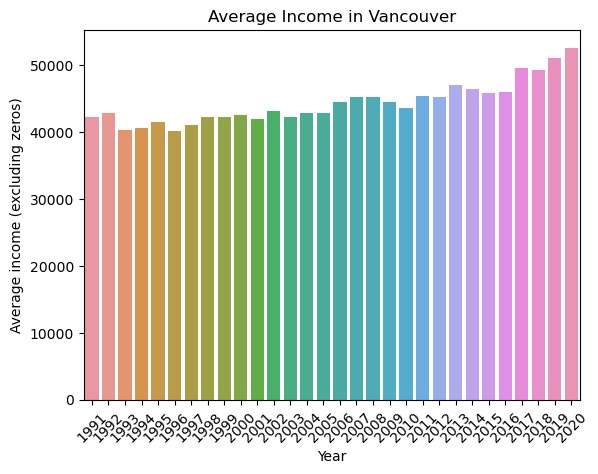

In [ ]:
plt.xticks(rotation=45)
graph = sns.barplot(data = income_dataset, x="Year", y="Average income (excluding zeros)")
graph.set(title="Average Income in Vancouver")

### Comments:
This bar graph gives us an understanding of the trend Average Income has followed in Vancouver. It has been rising consistently for quite a while now - but does not seem to follow the trends of HPI. Further analysis is needed but this is a good overview of its progression over the years.

In [ ]:
hpi_file = ("../data/raw/hpi_by_region.csv")
hpi_dataset = pd.read_csv(hpi_file)
hpi_dataset

,Unnamed: 0,Type,Month-year,Canada,Atlantic Region,Newfoundland and Labrador,Prince Edward Island,Nova Scotia,New Brunswick,Quebec,...,Manitoba,Saskatchewan,Alberta,British Columbia,"Kelowna, British Columbia","Vancouver, British Columbia","Victoria, British Columbia",Month-Year,year,month
0,0,House and Land,Jan-81,38.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,90.5,128.7,1981-01-01,1981,1
1,1,House and Land,Feb-81,38.7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,92.2,130.1,1981-02-01,1981,2
2,2,House and Land,Mar-81,39.3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,92.2,130.8,1981-03-01,1981,3
3,3,House and Land,Apr-81,39.9,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,91.8,130.8,1981-04-01,1981,4
4,4,House and Land,May-81,40.6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,91.8,132.5,1981-05-01,1981,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1489,1489,Land only,Feb-22,116.1,102.8,102.4,103.1,103.5,102.5,119.0,...,110.2,100.8,103.7,119.7,118.6,120.9,108.7,2022-02-01,2022,2
1490,1490,Land only,Mar-22,116.5,102.8,102.4,104.5,103.5,102.5,120.5,...,110.4,101.1,104.6,120.2,118.6,121.3,111.4,2022-03-01,2022,3
1491,1491,Land only,Apr-22,116.7,102.8,102.4,104.5,103.5,102.5,120.5,...,110.6,101.3,104.8,120.6,118.6,121.7,111.4,2022-04-01,2022,4
1492,1492,Land only,May-22,116.8,102.8,102.4,104.5,103.5,102.5,120.5,...,110.6,101.3,105.4,120.6,118.6,121.7,111.4,2022-05-01,2022,5


<AxesSubplot:xlabel='year', ylabel='Canada'>

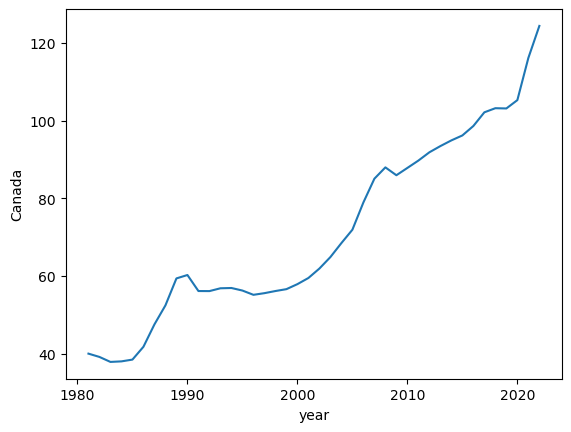

In [ ]:
sns.lineplot(data=hpi_plot, x='year', y='Canada')

### Comments
This csv file is centered around HPI (Housing Price index) - so seeing the trend of HPI across Canada gives us some context on how housing prices have moved in the last few decades.

In [ ]:
def load_and_process(path):
    df1 = (
        pd.read_csv(str(path) + "housing-supply-price-rental.csv")
        .loc[lambda x: x['region']=='vancouver']
        .reset_index(drop=True)
        .loc[:, ['year', 'population', 'region', 'HPI_change', 'CPI_change', 'completed', 'rental', 'total_dwelling', 'unemployment_rate']]
        .astype({'year': int})
        .loc[1:26]
    )
    
    df2 = (
        pd.read_csv(str(path) + "vancouver_income_main.csv")
        .set_axis(['year', 'no_of_people', 'people_with_income', 'aggre_income', 'avg_income', 'med_income'], axis=1)
        .loc[0:25]
    )
    
    df3 = (
        pd.read_csv(str(path) + "hpi_by_region.csv")
        .loc[:, ['year', 'Vancouver, British Columbia']]
        .set_axis(['year', 'total_hpi'], axis=1)
        
    )
    df4 = (df1.merge(df2, how='inner'))
    df5 = (df3.merge(df4, how='inner'))
    
    return df5

In [ ]:
final_df = load_and_process("../data/raw/")
final_df

,year,total_hpi,population,region,HPI_change,CPI_change,completed,rental,total_dwelling,unemployment_rate,no_of_people,people_with_income,aggre_income,avg_income,med_income
0,1991,79.5,1646.854,vancouver,-7.160019,5.171306,14630,1738,14769,6.6,1297,1207,50945,42200,33600
1,1991,77.3,1646.854,vancouver,-7.160019,5.171306,14630,1738,14769,6.6,1297,1207,50945,42200,33600
2,1991,78.9,1646.854,vancouver,-7.160019,5.171306,14630,1738,14769,6.6,1297,1207,50945,42200,33600
3,1991,79.1,1646.854,vancouver,-7.160019,5.171306,14630,1738,14769,6.6,1297,1207,50945,42200,33600
4,1991,80.0,1646.854,vancouver,-7.160019,5.171306,14630,1738,14769,6.6,1297,1207,50945,42200,33600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,2016,99.2,2548.740,vancouver,4.626774,2.173170,18148,6841,27914,5.4,2179,2120,97576,46000,35500
932,2016,99.5,2548.740,vancouver,4.626774,2.173170,18148,6841,27914,5.4,2179,2120,97576,46000,35500
933,2016,100.0,2548.740,vancouver,4.626774,2.173170,18148,6841,27914,5.4,2179,2120,97576,46000,35500
934,2016,100.0,2548.740,vancouver,4.626774,2.173170,18148,6841,27914,5.4,2179,2120,97576,46000,35500


<AxesSubplot:>

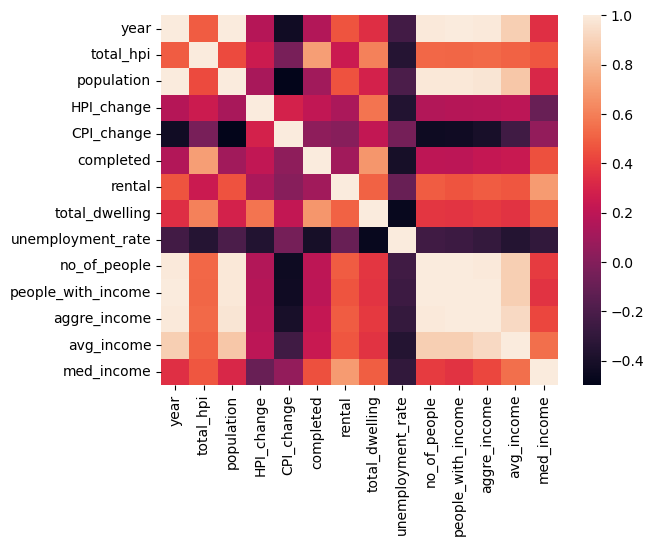

In [ ]:
sns.heatmap(final_df.corr())